In [1]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
import pandas as pd
import matplotlib.pyplot as plt

print("Ready to compare players.")

Ready to compare players.


In [2]:
# get player data
player1_name = "Stephen Curry"
player2_name = "Damian Lillard"

# get player 1
p1_info = players.find_players_by_full_name(player1_name)[0]
p1_id = p1_info['id']
p1_stats = playercareerstats.PlayerCareerStats(player_id=p1_id)
p1_df = p1_stats.get_data_frames()[0]
p1_df['PPG'] = p1_df['PTS'] / p1_df['GP']

# get player 2
p2_info = players.find_players_by_full_name(player2_name)[0]
p2_id = p2_info['id']
p2_stats = playercareerstats.PlayerCareerStats(player_id=p2_id)
p2_df = p2_stats.get_data_frames()[0]
p2_df['PPG'] = p2_df['PTS'] / p2_df['GP']

print(f"Loaded stats for {player1_name} and {player2_name}.")

Loaded stats for Stephen Curry and Damian Lillard.


In [3]:
# career averages
p1_career_ppg = p1_df['PTS'].sum() / p1_df['GP'].sum()
p2_career_ppg = p2_df['PTS'].sum() / p2_df['GP'].sum()

p1_career_rpg = p1_df['REB'].sum() / p1_df['GP'].sum()
p2_career_rpg = p2_df['REB'].sum() / p2_df['GP'].sum()

p1_career_apg = p1_df['AST'].sum() / p1_df['GP'].sum()
p2_career_apg = p2_df['AST'].sum() / p2_df['GP'].sum()

# comparison table
comparison = pd.DataFrame({
    'Stat': ['PPG', 'RPG', 'APG'],
    player1_name: [p1_career_ppg, p1_career_rpg, p1_career_apg],
    player2_name: [p2_career_ppg, p2_career_rpg, p2_career_apg]
})

print("\nCareer Averages Comparison:")
print(comparison.to_string(index=False))


Career Averages Comparison:
Stat  Stephen Curry  Damian Lillard
 PPG      24.759223       25.108889
 RPG       4.695146        4.272222
 APG       6.366019        6.743333


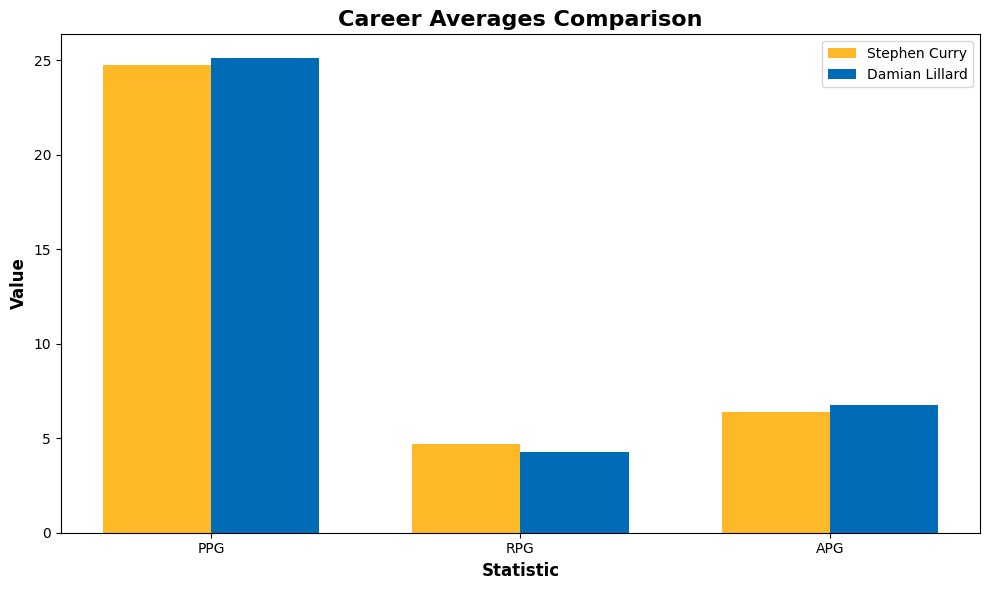

In [4]:
# comparison bar chart
fig, ax = plt.subplots(figsize=(10,6))

stats  = ['PPG', 'RPG', 'APG']
p1_values = [p1_career_ppg, p1_career_rpg, p1_career_apg]
p2_values = [p2_career_ppg, p2_career_rpg, p2_career_apg]

x = range(len(stats))
width = 0.35

ax.bar([i-width/2 for i in x], p1_values, width, label = player1_name, color = '#FDB927')
ax.bar([i+width/2 for i in x], p2_values, width, label = player2_name, color = '#006BB6')

ax.set_xlabel('Statistic', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Value', fontsize = 12, fontweight = 'bold')
ax.set_title('Career Averages Comparison', fontsize = 16, fontweight = 'bold')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.legend()

plt.tight_layout()
plt.savefig('../visualizations/player_comparison_bars.png', dpi = 300, bbox_inches = 'tight')
plt.show()


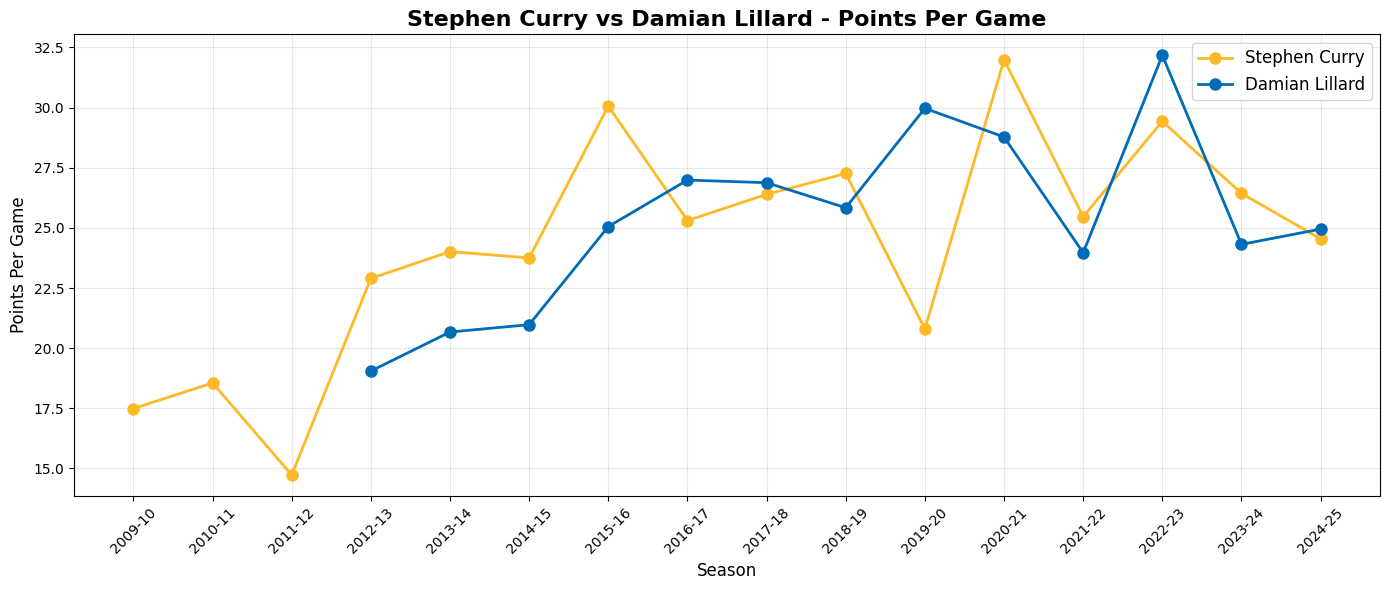

In [ ]:
# side by side PPG
plt.figure(figsize = (14,6))

plt.plot(p1_df['SEASON_ID'], p1_df['PPG'], marker = 'o', linewidth = 2,
         label = player1_name, color = '#FDB927', markersize = 8)
plt.plot(p2_df['SEASON_ID'], p2_df['PPG'], marker = 'o', linewidth = 2,
         label = player2_name, color = '#006BB6', markersize = 8)

plt.title(f"{player1_name} vs {player2_name} - Points Per Game",
          fontsize = 16, fontweight = 'bold')
plt.xlabel("Season", fontsize = 12)
plt.ylabel("Points Per Game", fontsize = 12)
plt.legend(fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.savefig('../visualizations/player_comparison_ppg.png', dpi = 300, bbox_inches = 'tight')
plt.show()